In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Load the data
file_path = 'Downloads/travel-times.csv'
data = pd.read_csv(file_path)
print(data.head())

       Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
0  1/6/2012     16:37     Friday    Home     51.29     127.4      78.3   
1  1/6/2012     08:20     Friday     GSK     51.63     130.3      81.8   
2  1/4/2012     16:17  Wednesday    Home     51.27     127.4      82.0   
3  1/4/2012     07:53  Wednesday     GSK     49.17     132.3      74.2   
4  1/3/2012     18:57    Tuesday    Home     51.15     136.2      83.4   

   AvgMovingSpeed FuelEconomy  TotalTime  MovingTime Take407All Comments  
0            84.8         NaN       39.3        36.3         No      NaN  
1            88.9         NaN       37.9        34.9         No      NaN  
2            85.8         NaN       37.5        35.9         No      NaN  
3            82.9         NaN       39.8        35.6         No      NaN  
4            88.1         NaN       36.8        34.8         No      NaN  


cluster
NaN     50
12.0    25
7.0     16
8.0     15
3.0     15
4.0     13
1.0     13
10.0    12
9.0     12
11.0     9
6.0      9
5.0      9
2.0      7
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_5104\3495335045.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl12.loc[np.random.choice(cl12.index, size=50, replace=False)] = np.nan  # Randomly set some values to NA


<Figure size 1000x600 with 0 Axes>

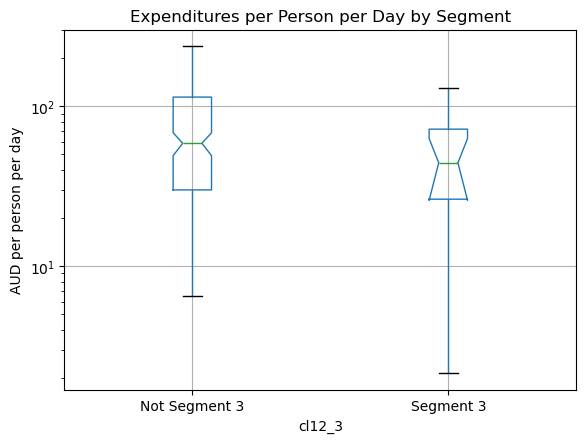

In [7]:
# For demonstration, let's assume we have 12 clusters
# Normally, you would obtain these from a biclustering algorithm
n_clusters = 12
np.random.seed(42)  # For reproducibility
data['cluster'] = np.random.choice(range(1, n_clusters + 1), size=len(data))

# Create segment membership vector (with some NAs for unassigned clusters)
cl12 = data['cluster']
cl12.loc[np.random.choice(cl12.index, size=50, replace=False)] = np.nan  # Randomly set some values to NA

# Tabulate the segment membership
print(cl12.value_counts(dropna=False))

# Create binary variable for Segment 3
cl12_3 = cl12 == 3
data['cl12_3'] = cl12_3.map({True: 'Segment 3', False: 'Not Segment 3'})

# Load additional information
# In actual practice, you would load the 'ausActivDesc' data
# Here we assume 'spendpppd' column exists in data
data['spendpppd'] = np.random.lognormal(mean=4, sigma=1, size=len(data))

# Boxplot of spend per person per day
plt.figure(figsize=(10, 6))
data.boxplot(column='spendpppd', by='cl12_3', notch=True, showfliers=False)
plt.yscale('log')
plt.ylabel('AUD per person per day')
plt.title('Expenditures per Person per Day by Segment')
plt.suptitle('')
plt.show()

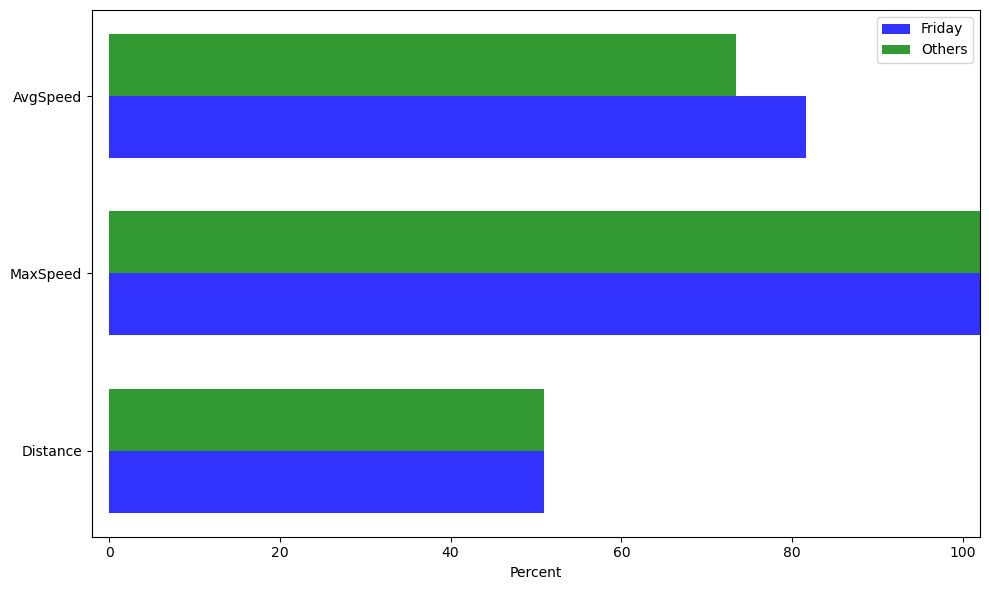

<Figure size 1200x800 with 0 Axes>

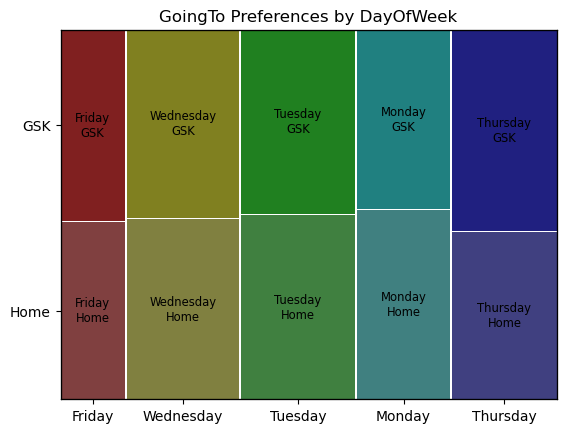

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is already loaded into 'data' DataFrame

# Define a function to plot proportional bar charts
def prop_barchart(data, columns, segment_column='DayOfWeek', segment_value='Friday', layout=(1, 1), xlab="Percent", xlim=(-2, 102)):
    # Filter data for the specified segment
    data_segment = data[data[segment_column] == segment_value]
    data_others = data[data[segment_column] != segment_value]
    
    # Calculate the proportions
    prop_segment = data_segment[columns].mean()
    prop_others = data_others[columns].mean()
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(columns))
    bar_width = 0.35
    opacity = 0.8

    bar1 = plt.barh(index, prop_segment, bar_width,
                    alpha=opacity,
                    color='b',
                    label=f'{segment_value}')

    bar2 = plt.barh(index + bar_width, prop_others, bar_width,
                    alpha=opacity,
                    color='g',
                    label='Others')

    plt.xlabel(xlab)
    plt.xlim(xlim)
    plt.yticks(index + bar_width / 2, columns)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot metrics for Friday
metrics_columns = ['Distance', 'MaxSpeed', 'AvgSpeed']
prop_barchart(data, metrics_columns, segment_column='DayOfWeek', segment_value='Friday')

# Generate a mosaic plot for GoingTo preferences by DayOfWeek
from statsmodels.graphics.mosaicplot import mosaic

# Crosstab of GoingTo by DayOfWeek
goingto_crosstab = pd.crosstab(data['GoingTo'], data['DayOfWeek'])

# Plotting the mosaic plot
plt.figure(figsize=(12, 8))
mosaic(data, ['DayOfWeek', 'GoingTo'], title="GoingTo Preferences by DayOfWeek")
plt.show()


cluster
NaN     50
12.0    25
7.0     16
8.0     15
3.0     15
4.0     13
1.0     13
10.0    12
9.0     12
11.0     9
6.0      9
5.0      9
2.0      7
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_5104\3198596575.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl12.loc[np.random.choice(cl12.index, size=50, replace=False)] = np.nan  # Randomly set some values to NA


<Figure size 1000x600 with 0 Axes>

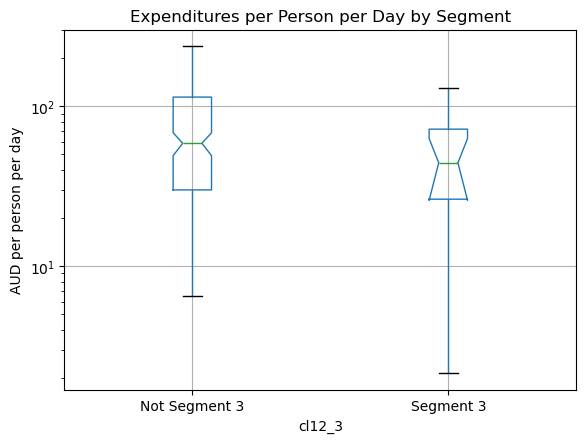

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Load the data
file_path = r'C:\Users\Admin\Downloads\.ipynb_checkpoints\travel-times-checkpoint.csv'
data = pd.read_csv(file_path)

# For demonstration, let's assume we have 12 clusters
# Normally, you would obtain these from a biclustering algorithm
n_clusters = 12
np.random.seed(42)  # For reproducibility
data['cluster'] = np.random.choice(range(1, n_clusters + 1), size=len(data))

# Create segment membership vector (with some NAs for unassigned clusters)
cl12 = data['cluster']
cl12.loc[np.random.choice(cl12.index, size=50, replace=False)] = np.nan  # Randomly set some values to NA

# Tabulate the segment membership
print(cl12.value_counts(dropna=False))

# Create binary variable for Segment 3
cl12_3 = cl12 == 3
data['cl12_3'] = cl12_3.map({True: 'Segment 3', False: 'Not Segment 3'})

# Generate random spend per person per day data for demonstration
# If you have actual expenditure data, replace this with the actual column
data['spendpppd'] = np.random.lognormal(mean=4, sigma=1, size=len(data))

# Boxplot of spend per person per day
plt.figure(figsize=(10, 6))
data.boxplot(column='spendpppd', by='cl12_3', notch=True, showfliers=False)
plt.yscale('log')
plt.ylabel('AUD per person per day')
plt.title('Expenditures per Person per Day by Segment')
plt.suptitle('')
plt.show()
